In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns4

from nltk import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
phys_data = pd.read_csv('data/physics_data.csv', index_col='id').drop(columns = 'Unnamed: 0')
chem_data = pd.read_csv('data/chemistry_data.csv', index_col='id').drop(columns = 'Unnamed: 0')
biol_data = pd.read_csv('data/biology_data.csv', index_col='id').drop(columns = 'Unnamed: 0')

In [4]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,3), max_features=3000)

In [5]:
phys_data.head()

,title,selftext,num_comments,created_utc,subreddit
id,,,,,
ifawuq,Help my smol brain!,A 1-kilogram block attached to a string revol...,0,2020-08-23 15:45:48,physics
if81q3,Why do we put a negative charge in the electro...,NaN,0,2020-08-23 13:11:22,physics
if6f8m,Free Textbooks,These two websites have had all the books I've...,1,2020-08-23 11:43:37,physics
if5ht4,Mini-theory (high school student don't be too ...,I just had a thought today about the existence...,10,2020-08-23 10:50:42,physics
if5frq,Is our universe inside a black hole,That would be weird right? Our universe is exp...,4,2020-08-23 10:47:23,physics


In [6]:
full_data = phys_data.append(chem_data).append(biol_data)
full_data.shape

(22249, 5)

In [7]:
full_data

,title,selftext,num_comments,created_utc,subreddit
id,,,,,
ifawuq,Help my smol brain!,A 1-kilogram block attached to a string revol...,0,2020-08-23 15:45:48,physics
if81q3,Why do we put a negative charge in the electro...,NaN,0,2020-08-23 13:11:22,physics
if6f8m,Free Textbooks,These two websites have had all the books I've...,1,2020-08-23 11:43:37,physics
if5ht4,Mini-theory (high school student don't be too ...,I just had a thought today about the existence...,10,2020-08-23 10:50:42,physics
if5frq,Is our universe inside a black hole,That would be weird right? Our universe is exp...,4,2020-08-23 10:47:23,physics
...,...,...,...,...,...
fd5700,How to distinguish between paid and nonpaid ac...,"Hi all,\n\nIt seems employers/recruiters make ...",0,2020-03-03 19:21:34,biology
fd56js,When the medium matters: The mighty mantis shr...,NaN,0,2020-03-03 19:20:44,biology
fd3xtv,Analyzing an experiment on human reaction time,**OPEN THE LINK FOR HELPING ME WITH THIS ASSIG...,0,2020-03-03 17:48:26,biology


In [14]:
full_data['subreddit'].value_counts()

biology      8038
chemistry    7346
physics      6865
Name: subreddit, dtype: int64

In [15]:
full_data['subreddit'].value_counts(normalize=True)
# A baseline for model accuracy:

biology      0.361275
chemistry    0.330172
physics      0.308553
Name: subreddit, dtype: float64

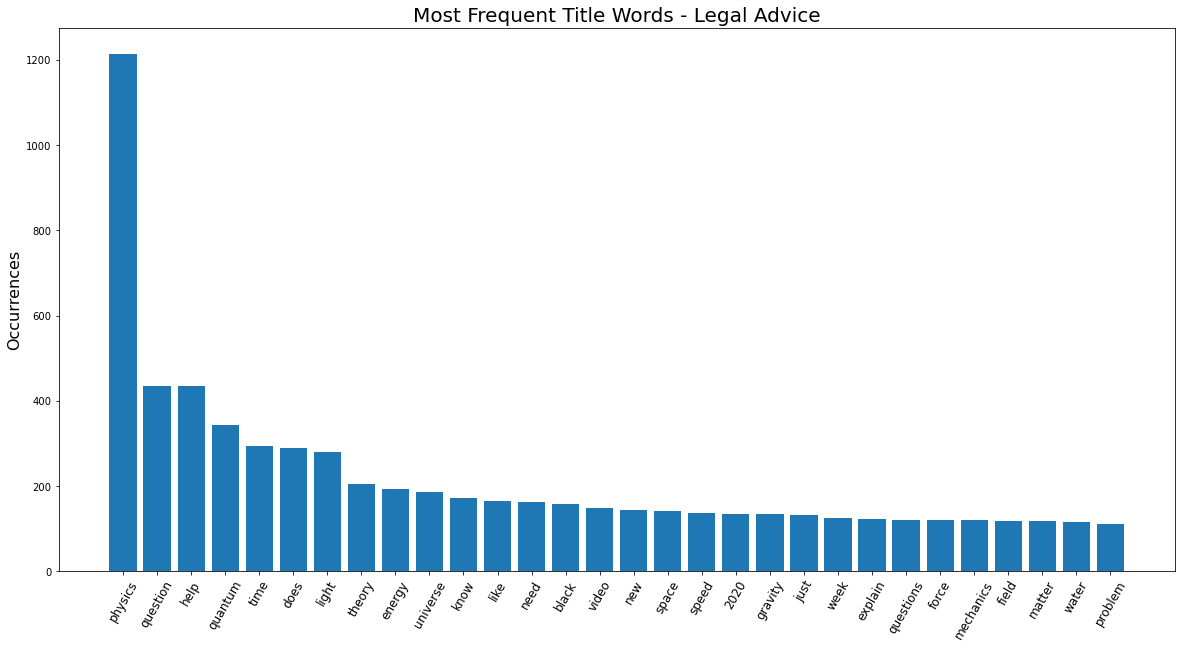

In [11]:
#Borrowed from lesson 5.04

X_phys = cv.fit_transform(phys_data['title'])
X_phys_df = pd.DataFrame(X_phys.toarray(), columns=cv.get_feature_names()) 

top_words = {}

# loop through columns
for i in X_phys_df.columns:
    # save sum of each column in dictionary
    top_words[i] = X_phys_df[i].sum() 
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (20,10))
plt.bar(most_freq.head(30)[0], most_freq.head(30)[1])
plt.xticks(rotation = 60, fontsize = 12)
plt.ylabel('Occurrences', fontsize = 16)
plt.title('Most Frequent Title Words - Physics', fontsize = 20)

plt.show()

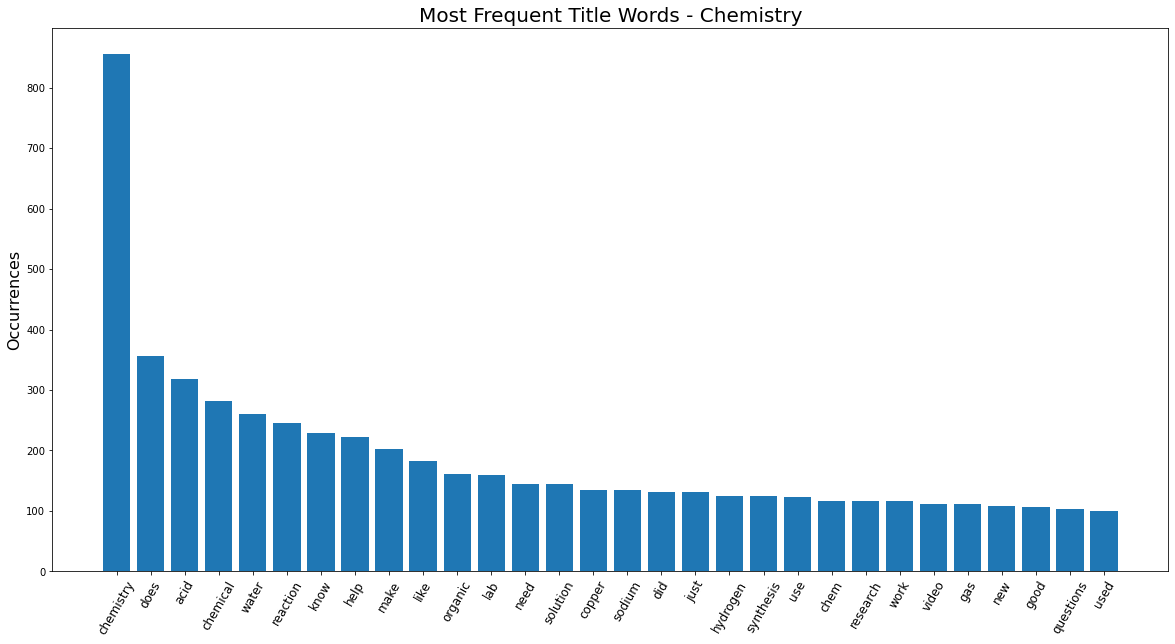

In [16]:
#Borrowed from lesson 5.04

X_chem = cv.fit_transform(chem_data['title'])
X_chem_df = pd.DataFrame(X_chem.toarray(), columns=cv.get_feature_names()) 

top_words = {}

# loop through columns
for i in X_chem_df.columns:
    # save sum of each column in dictionary
    top_words[i] = X_chem_df[i].sum() 
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (20,10))
plt.bar(most_freq.head(30)[0], most_freq.head(30)[1])
plt.xticks(rotation = 60, fontsize = 12)
plt.ylabel('Occurrences', fontsize = 16)
plt.title('Most Frequent Title Words - Chemistry', fontsize = 20)

plt.show()

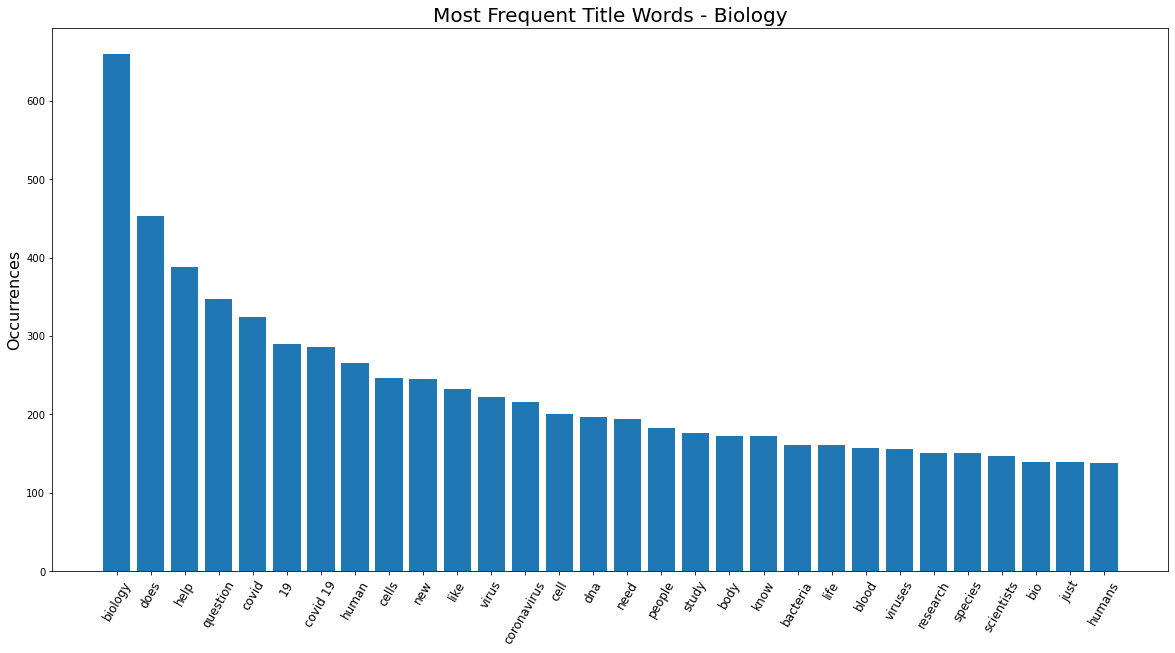

In [17]:
X_biol = cv.fit_transform(biol_data['title'])
X_biol_df = pd.DataFrame(X_biol.toarray(), columns=cv.get_feature_names()) 

top_words = {}

# loop through columns
for i in X_biol_df.columns:
    # save sum of each column in dictionary
    top_words[i] = X_biol_df[i].sum() 
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (20,10))
plt.bar(most_freq.head(30)[0], most_freq.head(30)[1])
plt.xticks(rotation = 60, fontsize = 12)
plt.ylabel('Occurrences', fontsize = 16)
plt.title('Most Frequent Title Words - Biology', fontsize = 20)

plt.show()